# Exploratory data analysis and data preprocessing for Moives Dataset from Pirated Sites

## 一 、数据摘要
    

In [16]:
#观察数据集结构
import pandas as pd
movies_df = pd.read_csv('./movies_dataset.csv')
movies_df.head()

,Unnamed: 0,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,0,4.8,R,John Swab,304,372092,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,105,Doc\r\n facilitates a fragile truce between th...,Little Dixie,"2,794",John Swab
1,1,6.4,TV-PG,Paul Ziller,73,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,"1,002",John Christian Plummer
2,2,5.2,R,Ben Wheatley,"1,427",343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,1h 47min,As the world searches for a cure to a disastro...,In the Earth,"14,419",Ben Wheatley
3,3,8.1,NaN,Venky Atluri,"1,549",372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,139,The life of a young man and his struggles agai...,Vaathi,"4,878",Venky Atluri
4,4,4.6,NaN,Shaji Kailas,657,372089,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,122,A man named Kalidas gets stranded due to the p...,Alone,"2,438",Rajesh Jayaraman


In [17]:
movies_df.dtypes

Unnamed: 0           int64
IMDb-rating        float64
appropriate_for     object
director            object
downloads           object
id                   int64
industry            object
language            object
posted_date         object
release_date        object
run_time            object
storyline           object
title               object
views               object
writer              object
dtype: object

从数据集的前几行看，我们可以看到以下属性：

    IMDb-rating (数值属性): IMDB评分
    appropriate_for (标称属性): 适宜观看的年龄分级
    director (标称属性): 导演
    downloads (数值属性): 下载次数（格式需要处理，含有逗号）
    id (数值属性): 电影的ID
    industry (标称属性): 电影行业/语言
    language (标称属性): 语言
    posted_date (标称属性): 发布日期
    release_date (标称属性): 发布日期
    run_time (数值属性): 运行时间（格式需要处理，混合了小时和分钟）
    storyline (标称属性): 故事情节
    title (标称属性): 标题
    views (数值属性): 观看次数（格式需要处理，含有逗号）
    writer (标称属性): 编剧

In [26]:
# 数据清理和转换

# 处理 'run_time'：将格式统一转换为分钟，然后转换为数值类型
def convert_runtime_to_minutes(runtime):
    if isinstance(runtime, str):
        parts = runtime.split(' ')
        minutes = 0
        for part in parts:
            if 'h' in part:
                minutes_part = part.replace('h', '')
                if minutes_part:  # 检查字符串是否非空
                    minutes += int(minutes_part) * 60
            elif 'min' in part:
                minutes_part = part.replace('min', '')
                if minutes_part:  # 检查字符串是否非空
                    minutes += int(minutes_part)
        return minutes
    return runtime
movies_df['run_time'] = movies_df['run_time'].apply(convert_runtime_to_minutes)

# 验证转换后的数据类型
movies_df.dtypes, movies_df.head()

(Unnamed: 0           int64
 IMDb-rating        float64
 appropriate_for     object
 director            object
 downloads          float64
 id                   int64
 industry            object
 language            object
 posted_date         object
 release_date        object
 run_time           float64
 storyline           object
 title               object
 views              float64
 writer              object
 dtype: object,
    Unnamed: 0  IMDb-rating appropriate_for      director  downloads      id  \
 0           0          4.8               R     John Swab      304.0  372092   
 1           1          6.4           TV-PG   Paul Ziller       73.0  372091   
 2           2          5.2               R  Ben Wheatley     1427.0  343381   
 3           3          8.1             NaN  Venky Atluri     1549.0  372090   
 4           4          4.6             NaN  Shaji Kailas      657.0  372089   
 
               industry       language   posted_date release_date  run_time  \
 0 

  ### 1. 标称属性，给出每个可能取值的频数

  

In [27]:
# 标称属性的频数分析
nominal_columns = ['appropriate_for', 'director', 'industry', 'language']
nominal_frequencies = {column: movies_df[column].value_counts() for column in nominal_columns}

nominal_frequencies

{'appropriate_for': appropriate_for
 R                 4384
 Not Rated         2142
 PG-13             1968
 PG                 886
 TV-14              694
 TV-MA              406
 G                  152
 Unrated            132
 TV-PG              115
 TV-G                99
 TV-Y7               45
 TV-Y                25
 Approved             9
 NC-17                4
 TV-Y7-FV             3
 Passed               3
 MA-17                1
 TV-13                1
 Drama                1
 Drama, Romance       1
 18+                  1
 Name: count, dtype: int64,
 'director': director
 Venky Atluri                                  405
 Simone Stock                                  403
 Xavier Manrique                               403
 John Swab                                     205
 Neil Jordan                                   205
                                              ... 
 Agnieszka Smoczynska                            1
 Dylan Thomas Ellis                              1
 S

从标称属性的频数分析结果不难看出，在该数据集的标称属性中：
1. 适宜观看年龄(appropriate_for):  
    R级最多，共有4384次出现。  
    未评级(Not Rated)次之，有2142次出现。  
    其余按出现频次依次是PG-13、PG、TV-14等。  

2. 导演(director):  
    Venky Atluri、Simone Stock和Xavier Manrique是出现频率最高的导演，他们的作品数量都超过了400部。  
    其他导演的作品数量分布较广，有许多导演只有一部作品出现在数据集中。  

3. 产业(industry):  
    大部分电影属于好莱坞/英语片区，共有14649部。  
    其次是宝莱坞/印度产业，有2645部电影。  
    托莱坞、动画/儿童、摔跤等其他类型的产业数量明显较少。  

4. 语言(language):  
    英语共12657次出现。  
    其次是印地语，出现了2558次。  
    还有一些电影提供了多语言版本，如英语+西班牙语、英语+印地语等，但数量相对较少  

### 2. 数值属性，给出5数概括及缺失值的个数

In [20]:
# 数值属性的五数概括及缺失值个数
numerical_columns = ['IMDb-rating', 'downloads', 'id', 'run_time', 'views']
numerical_summary = pd.DataFrame(index=['min', '25%', '50%', '75%', 'max', 'missing values'])

for column in numerical_columns:
    numerical_summary[column] = [
        movies_df[column].min(),
        movies_df[column].quantile(0.25),
        movies_df[column].median(),
        movies_df[column].quantile(0.75),
        movies_df[column].max(),
        movies_df[column].isnull().sum()
    ]

numerical_summary

,IMDb-rating,downloads,id,run_time,views
min,1.1,0.0,1.00,10.0,667.0
25%,4.8,855.5,96122.25,88.0,7571.5
50%,5.7,2716.0,264457.50,94.0,15222.0
75%,6.6,10070.0,354561.25,104.0,36571.0
max,9.9,391272.0,372092.00,271.0,1638533.0
missing values,841.0,1.0,0.00,15102.0,1.0


数值属性的五数概括及缺失值个数总览如下

   1. IMDb评分(IMDb-rating):  
        最低1.1，最高9.9，中位数5.7。  
        缺失值个数为841。  

   2. 下载量(downloads):  
        范围从0到391,272，中位数为2,716。  
        缺失值个数为1。  

   3. 电影ID(id):  
        ID范围从1到372,092，没有缺失值。  

   4. 时长(run_time):  
        电影时长从10分钟到271分钟不等，中位数为94分钟。  
        缺失值个数为15,102，表明许多电影的时长信息缺失。  

   5. 观看量(views):  
        观看量范围从667到1,638,533，中位数为15,222。  
        缺失值个数为1。  

## 二、数据可视化

### 1. 使用直方图检查数据分布

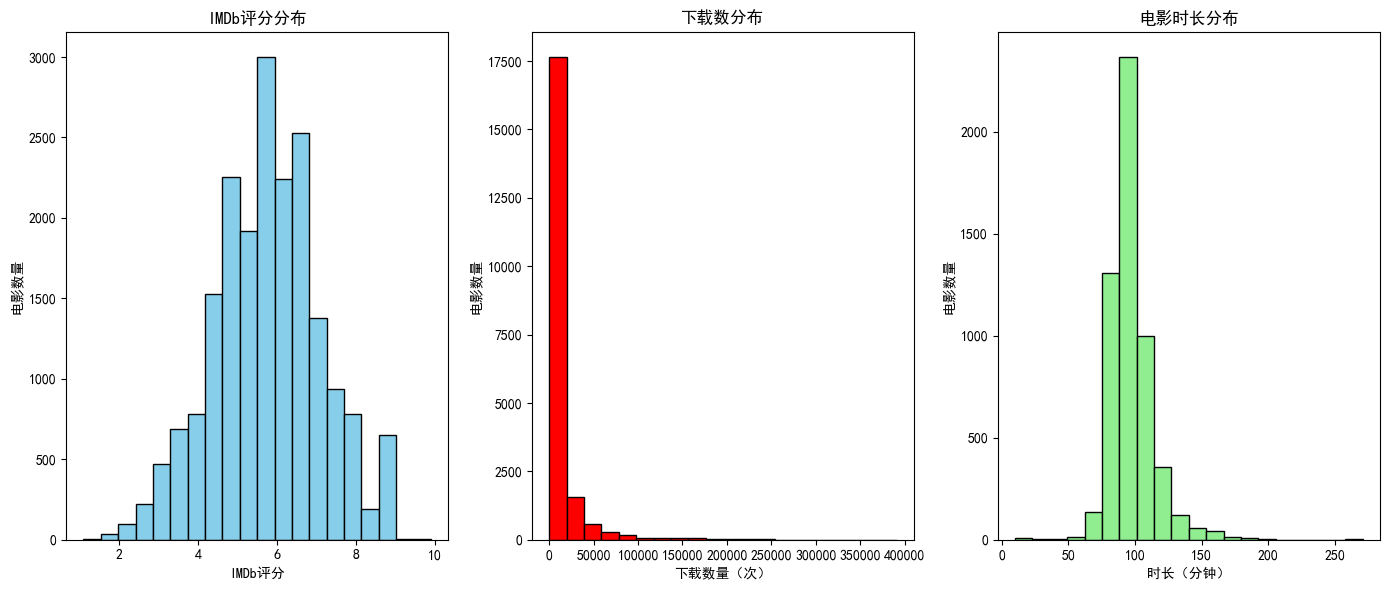

In [31]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=Warning) 
# 设置绘图样式
plt.rcParams['font.sans-serif'] = ['SimHei']

# 绘制直方图
fig, ax = plt.subplots(1, 3, figsize=(14, 6))

# IMDb-rating 直方图
ax[0].hist(movies_df['IMDb-rating'].dropna(), bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('IMDb评分分布')
ax[0].set_xlabel('IMDb评分')
ax[0].set_ylabel('电影数量')

# downloads 直方图
ax[1].hist(movies_df['downloads'].dropna(), bins=20, color='red', edgecolor='black')
ax[1].set_title('下载数分布')
ax[1].set_xlabel('下载数量（次）')
ax[1].set_ylabel('电影数量')

# run_time 直方图
ax[2].hist(movies_df['run_time'].dropna(), bins=20, color='lightgreen', edgecolor='black')
ax[2].set_title('电影时长分布')
ax[2].set_xlabel('时长（分钟）')
ax[2].set_ylabel('电影数量')

plt.tight_layout()
plt.show()


    IMDb-rating分布：呈现出相对均匀的分布，大部分电影的评分集中在4到8分之间，少数电影的评分高于8分或低于4分。
    Downloads分布：大部分电影的下载次数较少，但存在少数下载次数非常高的电影，说明一些电影极其受欢迎。
    Run Time分布：大多数电影的运行时间集中在80到140分钟之间，符合一般电影的标准长度。

### 2. 使用盒图检查数据离散点

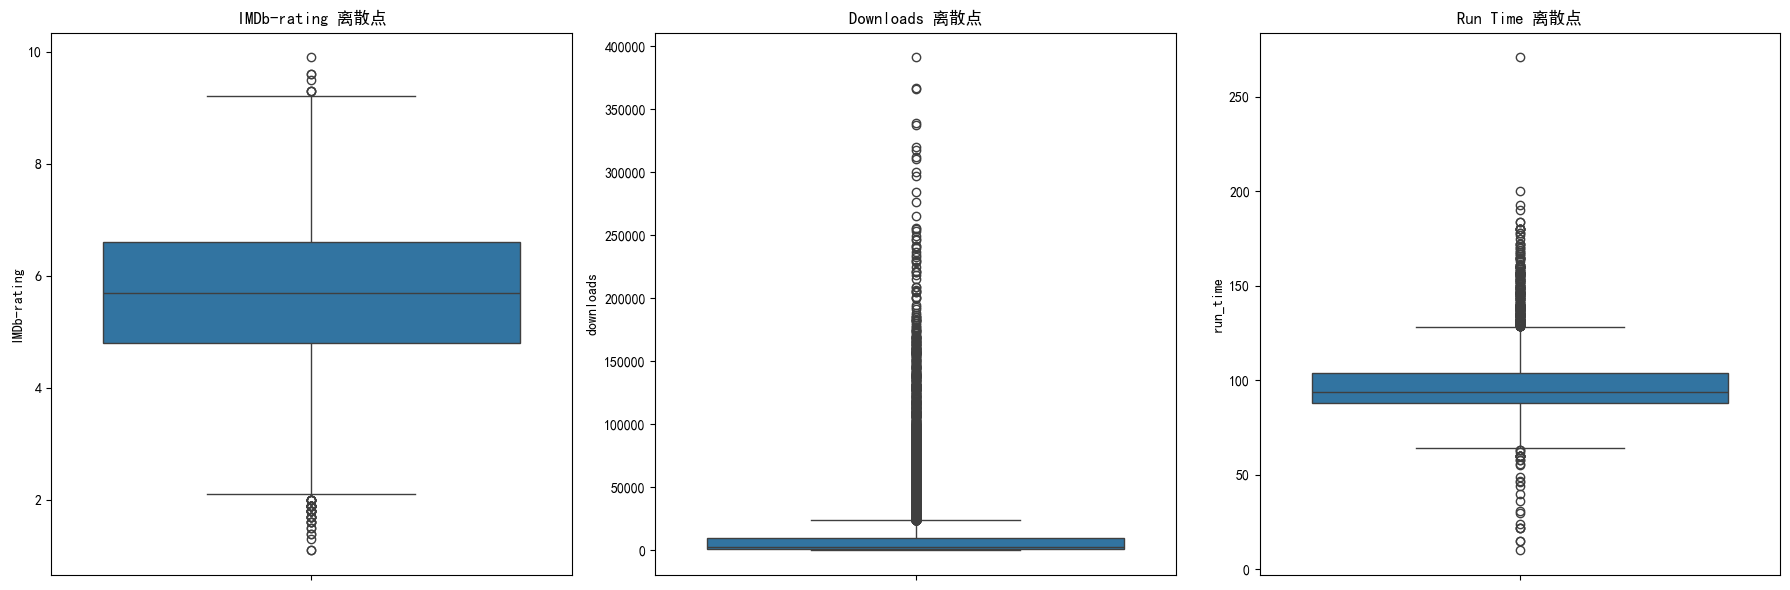

In [32]:
# 绘制盒图
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']
# 2. 使用盒图检查数据离散点
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(data=movies_df, y='IMDb-rating')
plt.title('IMDb-rating 离散点')

plt.subplot(1, 3, 2)
sns.boxplot(data=movies_df, y='downloads')
plt.title('Downloads 离散点')

plt.subplot(1, 3, 3)
sns.boxplot(data=movies_df, y='run_time')
plt.title('Run Time 离散点')

plt.tight_layout()
plt.show()

    IMDb-rating离散点：盒图显示大多数电影的评分集中在5到7分之间，有一些极端的低评分和高评分电影。
    Downloads离散点：下载次数有较大的离散性，存在一些极端的高下载次数电影。
    Run Time离散点：大多数电影的运行时间比较集中，也有少数极短或极长的电影。

# 三、缺失数据处理

### 1. 将缺失部分剔除

In [47]:
# 重新加载数据集以获取原始的缺失值情况
movies_df_original = pd.read_csv('./movies_dataset.csv')

In [48]:
# 将缺失部分剔除
movies_df_dropped = movies_df_original.dropna()
# 显示处理后的数据集的前几行和原数据集的行数对比
(movies_df_dropped.head(), movies_df_original.shape[0], movies_df_dropped.shape[0])

(   Unnamed: 0  IMDb-rating appropriate_for        director downloads      id  \
 0           0          4.8               R       John Swab       304  372092   
 1           1          6.4           TV-PG     Paul Ziller        73  372091   
 2           2          5.2               R    Ben Wheatley     1,427  343381   
 7           7          6.5               R  Benjamin Caron     1,781  371751   
 8           8          6.9           PG-13     Ravi Kapoor       458  372042   
 
               industry       language   posted_date release_date  run_time  \
 0  Hollywood / English        English  20 Feb, 2023  Jan 28 2023       105   
 1  Hollywood / English        English  20 Feb, 2023  Feb 05 2023        84   
 2  Hollywood / English  English,Hindi  20 Apr, 2021  Jun 18 2021  1h 47min   
 7  Hollywood / English        English  13 Feb, 2023  Feb 17 2023       116   
 8  Hollywood / English        English  18 Feb, 2023  Dec 02 2022        80   
 
                                    

剔除包含缺失值的行之前，原始数据集中有20,548行，处理后剩下9902行  

In [49]:
# 计算重新加载的数据集中每列缺失值的数量
missing_values_per_column_original = movies_df_original.isnull().sum()
missing_values_per_column_original

Unnamed: 0            0
IMDb-rating         841
appropriate_for    9476
director           1938
downloads             1
id                    0
industry              1
language            546
posted_date           1
release_date          1
run_time           1768
storyline          1701
title                 1
views                 1
writer             2192
dtype: int64

可以看见在所有的含有缺失值的数据中"apppriate_for"属性列的占比高达 89%  
因此盲目的直接去除所有含有缺失值的行会使得样本空间大大减少  
所以我们要对其进行二次处理

In [80]:
# 计算 appropriate_for 的值计数
appropriate_count_series = movies_df_original['appropriate_for'].value_counts()
# 将 Series 转换为 DataFrame
appropriate_count_df = appropriate_count_series.reset_index()
# 重命名列
appropriate_count_df.columns = ['appropriate_for', 'appropriate_count']
# 根据计数列排序
appropriate_count_sorted = appropriate_count_df.sort_values(by='appropriate_count', ascending=True)

In [81]:
mov_data_cleaned = movies_df_original.dropna()
'18+' in list(mov_data_cleaned['appropriate_for'].value_counts().index)

True

In [82]:
appropriate_count_cleaned = appropriate_count
appropriate_count_cleaned['appropriate_count_cleaned'] = [0] * len(appropriate_count)

for level in list(appropriate_count.index):
    if level in list(mov_data_cleaned['appropriate_for'].value_counts().index):
        appropriate_count_cleaned.loc[[level], ['appropriate_count_cleaned']] = mov_data_cleaned['appropriate_for'].value_counts().loc[[level]].values[0]

In [83]:
appropriate_count_cleaned

,count,count,appropriate_count_cleaned
0,R,4384,0
1,Not Rated,2142,0
2,PG-13,1968,0
3,PG,886,0
4,TV-14,694,0
5,TV-MA,406,0
6,G,152,0
7,Unrated,132,0
8,TV-PG,115,0
9,TV-G,99,0


In [63]:
import copy
from numpy import nan as NA
HF = {}
mov_data_HF_replaced = copy.deepcopy(movies_df_original)
for col in mov_data_HF_replaced:
    HF[col] = mov_data_HF_replaced[col].value_counts().index[0]
HF['language'] = 'English'
HF

{'Unnamed: 0': 0,
 'IMDb-rating': 6.6,
 'appropriate_for': 'R',
 'director': 'Venky Atluri',
 'downloads': '75',
 'id': 372090,
 'industry': 'Hollywood / English',
 'language': 'English',
 'posted_date': '13 Feb, 2023',
 'release_date': 'Jan 01 1970',
 'run_time': '93',
 'storyline': 'The life of a young man and his struggles against the privatization of education.',
 'title': 'The Girl Who Escaped: The Kara Robinson Story',
 'views': '6,259',
 'writer': 'Nicholas Schutt'}

In [64]:
for col in mov_data_HF_replaced:
    mov_data_HF_replaced[col] = mov_data_HF_replaced[col].replace(NA, HF[col])
mov_data_HF_replaced.isna().sum()

Unnamed: 0         0
IMDb-rating        0
appropriate_for    0
director           0
downloads          0
id                 0
industry           0
language           0
posted_date        0
release_date       0
run_time           0
storyline          0
title              0
views              0
writer             0
dtype: int64

In [65]:
mov_data_HF_replaced.head(10)

,Unnamed: 0,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,0,4.8,R,John Swab,304,372092,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,105,Doc\r\n facilitates a fragile truce between th...,Little Dixie,"2,794",John Swab
1,1,6.4,TV-PG,Paul Ziller,73,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,"1,002",John Christian Plummer
2,2,5.2,R,Ben Wheatley,"1,427",343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,1h 47min,As the world searches for a cure to a disastro...,In the Earth,"14,419",Ben Wheatley
3,3,8.1,R,Venky Atluri,"1,549",372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,139,The life of a young man and his struggles agai...,Vaathi,"4,878",Venky Atluri
4,4,4.6,R,Shaji Kailas,657,372089,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,122,A man named Kalidas gets stranded due to the p...,Alone,"2,438",Rajesh Jayaraman
5,5,5.4,R,Srinivas Gavireddy,746,372088,Tollywood,Hindi,"20 Feb, 2023",Nov 26 2021,131,"Bagaram,\r\n after inheriting his grandfather'...",Anubhavinchu Raja,"2,940","Srinivas Gavireddy, Mayukh Adithya"
6,6,6.6,TV-PG,Venky Atluri,"5,332",372059,Wrestling,English,"19 Feb, 2023",Feb 18 2023,200,Undisputed\r\n WWE Universal title: Reigns vs ...,WWE Elimination Chamber,"11,978",Nicholas Schutt
7,7,6.5,R,Benjamin Caron,"1,781",371751,Hollywood / English,English,"13 Feb, 2023",Feb 17 2023,116,"Motivations are suspect, and expectations are ...",Sharper,"18,225","Brian Gatewood, Alessandro Tanaka"
8,8,6.9,PG-13,Ravi Kapoor,458,372042,Hollywood / English,English,"18 Feb, 2023",Dec 02 2022,80,An\r\n unmotivated South Asian American rapper...,Four Samosas,"6,912",Ravi Kapoor
9,9,4.2,R,Danny LeGare,"1,965",372041,Hollywood / English,English,"18 Feb, 2023",Feb 07 2023,80,A\r\n family moves back to a farm in the mothe...,Blood Harvest,"9,710","Michael Hultquist, Danny LeGare, Seth Metoyer"


In [66]:
mov_data_HF_replaced['appropriate_for'].value_counts()

appropriate_for
R                 13860
Not Rated          2142
PG-13              1968
PG                  886
TV-14               694
TV-MA               406
G                   152
Unrated             132
TV-PG               115
TV-G                 99
TV-Y7                45
TV-Y                 25
Approved              9
NC-17                 4
TV-Y7-FV              3
Passed                3
MA-17                 1
TV-13                 1
Drama                 1
Drama, Romance        1
18+                   1
Name: count, dtype: int64

### 2. 用最高频率值来填补缺失值除

In [38]:
# 用最高频率值来填补缺失值
for column in movies_df.columns:
    # 获取最高频率的值（众数）
    most_frequent_value = movies_df[column].mode()[0]
    # 填补缺失值
    movies_df[column].fillna(most_frequent_value, inplace=True)

# 显示处理后的数据集的前几行
movies_df.head()

,Unnamed: 0,IMDb-rating,appropriate_for,director,downloads,id,industry,language,posted_date,release_date,run_time,storyline,title,views,writer
0,0,4.8,R,John Swab,304.0,372092,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,90.0,Doc\r\n facilitates a fragile truce between th...,Little Dixie,2794.0,John Swab
1,1,6.4,TV-PG,Paul Ziller,73.0,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,90.0,Caterer\r\n Goldy Berry reunites with detectiv...,Grilling Season: A Curious Caterer Mystery,1002.0,John Christian Plummer
2,2,5.2,R,Ben Wheatley,1427.0,343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,107.0,As the world searches for a cure to a disastro...,In the Earth,14419.0,Ben Wheatley
3,3,8.1,R,Venky Atluri,1549.0,372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,90.0,The life of a young man and his struggles agai...,Vaathi,4878.0,Venky Atluri
4,4,4.6,R,Shaji Kailas,657.0,372089,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,90.0,A man named Kalidas gets stranded due to the p...,Alone,2438.0,Rajesh Jayaraman


### 3. 通过属性的相关关系来填补缺失值

In [90]:
import numpy as np
mov_data_attr_corr = copy.deepcopy(movies_df_original)

In [91]:
df_coded = pd.get_dummies(mov_data_attr_corr, columns=['appropriate_for'], dummy_na=True, drop_first=True)
df_coded.head()

,Unnamed: 0,IMDb-rating,director,downloads,id,industry,language,posted_date,release_date,run_time,...,appropriate_for_TV-13,appropriate_for_TV-14,appropriate_for_TV-G,appropriate_for_TV-MA,appropriate_for_TV-PG,appropriate_for_TV-Y,appropriate_for_TV-Y7,appropriate_for_TV-Y7-FV,appropriate_for_Unrated,appropriate_for_nan
0,0,4.8,John Swab,304,372092,Hollywood / English,English,"20 Feb, 2023",Jan 28 2023,105,...,False,False,False,False,False,False,False,False,False,False
1,1,6.4,Paul Ziller,73,372091,Hollywood / English,English,"20 Feb, 2023",Feb 05 2023,84,...,False,False,False,False,True,False,False,False,False,False
2,2,5.2,Ben Wheatley,"1,427",343381,Hollywood / English,"English,Hindi","20 Apr, 2021",Jun 18 2021,1h 47min,...,False,False,False,False,False,False,False,False,False,False
3,3,8.1,Venky Atluri,"1,549",372090,Tollywood,Hindi,"20 Feb, 2023",Feb 17 2023,139,...,False,False,False,False,False,False,False,False,False,True
4,4,4.6,Shaji Kailas,657,372089,Tollywood,Hindi,"20 Feb, 2023",Jan 26 2023,122,...,False,False,False,False,False,False,False,False,False,True


In [92]:
# 从 df_coded 中排除非数值型列
df_coded_numeric = df_coded.select_dtypes(include=[np.number])
# 对数值型数据计算斯皮尔曼相关系数
corr_matrix = df_coded_numeric.corr(method='spearman')
# 显示相关系数矩阵
corr_matrix

,Unnamed: 0,IMDb-rating,id
Unnamed: 0,1.000000,0.048519,-0.747947
IMDb-rating,0.048519,1.000000,0.065239
id,-0.747947,0.065239,1.000000


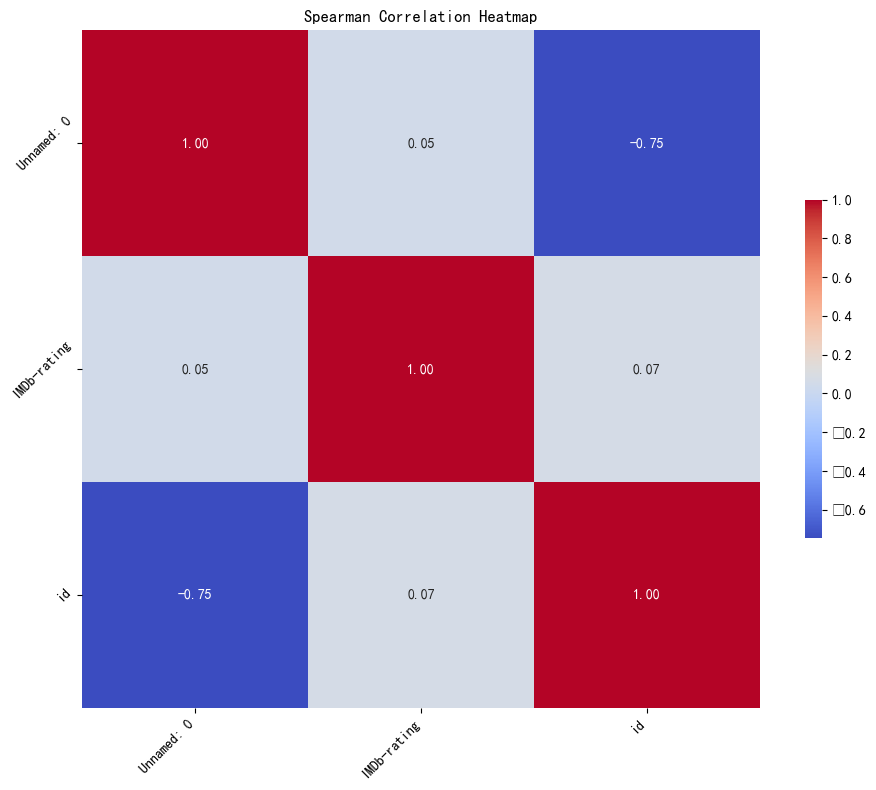

In [94]:
# 假设 df_coded_numeric 是之前步骤中筛选出的只包含数值型数据的 DataFrame
df_coded_numeric = df_coded.select_dtypes(include=[np.number])

# 计算相关系数矩阵
corr_matrix = df_coded_numeric.corr(method='spearman')

# 绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'shrink': .5})
plt.title('Spearman Correlation Heatmap')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()